In [2]:
pip install plotly==4.14.3


--- Logging error ---
Traceback (most recent call last):
  File "D:\Anaconda\lib\logging\__init__.py", line 1084, in emit
    stream.write(msg + self.terminator)
  File "D:\Anaconda\lib\site-packages\pip\_vendor\colorama\ansitowin32.py", line 162, in write
    self.write_and_convert(text)
  File "D:\Anaconda\lib\site-packages\pip\_vendor\colorama\ansitowin32.py", line 190, in write_and_convert
    self.write_plain_text(text, cursor, len(text))
  File "D:\Anaconda\lib\site-packages\pip\_vendor\colorama\ansitowin32.py", line 195, in write_plain_text
    self.wrapped.write(text[start:end])
  File "D:\Anaconda\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 32-33: character maps to <undefined>
Call stack:
  File "D:\Anaconda\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Anaconda\lib\runpy.py", 


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=7bdc43bbe525ee6b5f8767d34194be5a548613030f32709e758e630f861d78fe
Successfully built retrying


In [3]:
import numpy as np
import random
import xlrd
import seaborn as sns
import pandas as pd
import plotly.offline
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import collections
import datetime
import json
import re




In [4]:
data = pd.read_csv(r'D:\Data_MIning\MoviesOnStreamingPlatforms_updated.csv')
columns = data.columns
print(columns)

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


In [5]:
#Showing the first 10 values in the dataset 
data.head(20)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [6]:
data.shape


(16744, 17)

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [8]:
data.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [9]:
data.nunique()

Unnamed: 0         16744
ID                 16744
Title              16744
Year                 109
Age                    5
IMDb                  82
Rotten Tomatoes       99
Netflix                2
Hulu                   2
Prime Video            2
Disney+                2
Type                   1
Directors          11338
Genres              1909
Country             1303
Language            1102
Runtime              225
dtype: int64

In [10]:
#Dropping all the duplicate values in the dataSet 
data.drop_duplicates(subset='Title',
                         keep='first',inplace=True)

In [52]:
#deleted unneccesary columns, unnamed and type
df = data.drop(columns=['Unnamed: 0', 'Type','ID'])

In [53]:
#Filling the missing values in IMDB rating and Rotten Tomatoes So that it doesn't affect the analysis
#We are also converting the data type to intger so that analysis could be easy
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna('0%')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])

df['IMDb'] = df['IMDb'].fillna(0)
df['IMDb'] = df['IMDb']*10
df['IMDb'] = df['IMDb'].astype('int')

In [54]:
df.head(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,88,87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,87,87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,85,84,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,85,96,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,88,97,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,Spider-Man: Into the Spider-Verse,2018,7+,84,97,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,The Pianist,2002,18+,85,95,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,Django Unchained,2012,18+,84,87,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,Raiders of the Lost Ark,1981,7+,84,95,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,Inglourious Basterds,2009,18+,83,89,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [55]:
columns=[
        'Title',  'Directors',
      'Country', 'Language'
]
 

df['Title'] = df['Title'].apply(lambda x: x.lower())


In [56]:
df.head(2)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,inception,2010,13+,88,87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,the matrix,1999,18+,87,87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


<AxesSubplot:xlabel='Country', ylabel='count'>

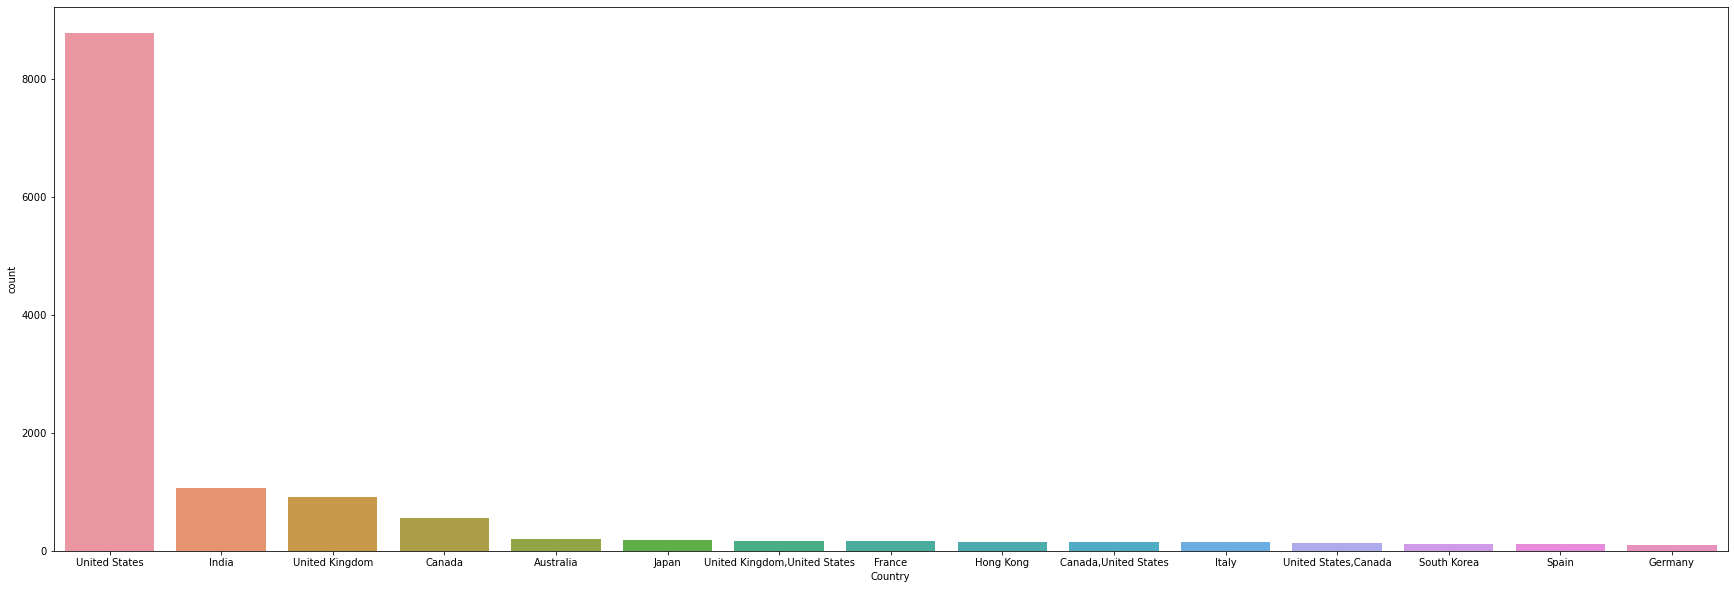

In [57]:
# The analysis of countries in which the movies were produced
plt.figure(figsize=(30,10))
sns.countplot(x='Country', data=df, order=df.Country.value_counts().index[0:15])

<AxesSubplot:xlabel='StreamingOn'>

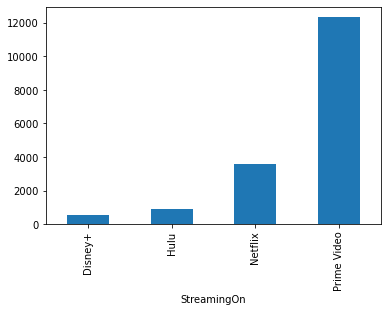

In [59]:
#Number of movies in each streaming plateform
df_long=pd.melt(df[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
df_long = df_long[df_long['Present'] == 1]
df_long.drop(columns=['Present'],inplace=True)
df_combined = df_long.merge(df, on='Title', how='inner')
df_combined.drop(columns = ['Netflix',
                                  'Hulu', 'Prime Video', 'Disney+'], inplace=True)
df_both_ratings = df_combined[(df_combined.IMDb > 0) & df_combined['Rotten Tomatoes'] > 0]
df_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [60]:
# Finding Out which streaming plateform is the best for Subscription according to IMBD and Rotten Tomamtoes Rating
figure = []
figure.append(px.violin(df_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(df_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [61]:
#Using Scatter Plot to See which Plateform is better for subscription 
px.scatter(df_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Movie Length Distribution'}, xlabel='Runtime', ylabel='Density'>

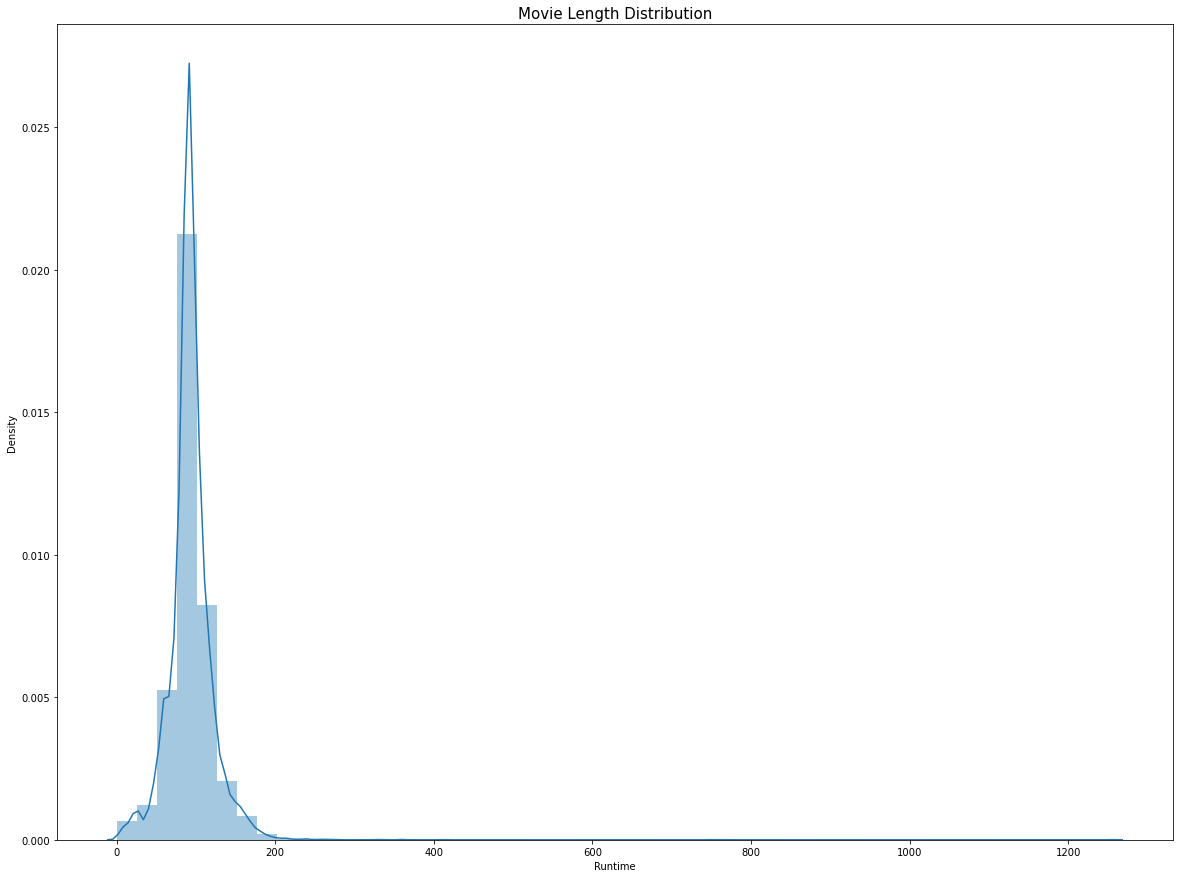

In [62]:
#The average Runtime of Movie
plt.figure(figsize=(20,15))
plt.title("Movie Length Distribution", fontsize=15)
sns.distplot(df.Runtime)

<AxesSubplot:xlabel='Genres', ylabel='count'>

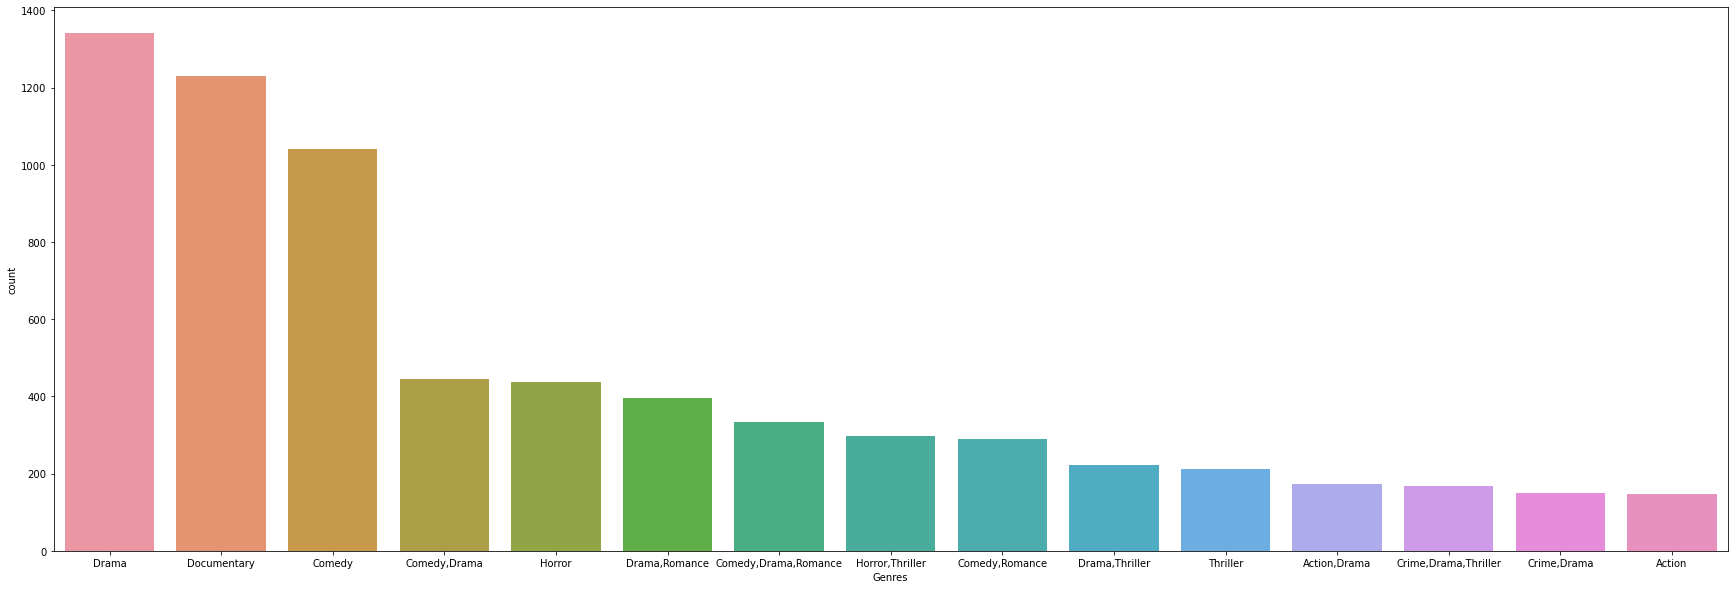

In [63]:
plt.figure(figsize=(30,10))
sns.countplot(x='Genres', data=df, order=df.Genres.value_counts().index[0:15])

<AxesSubplot:xlabel='Language', ylabel='count'>

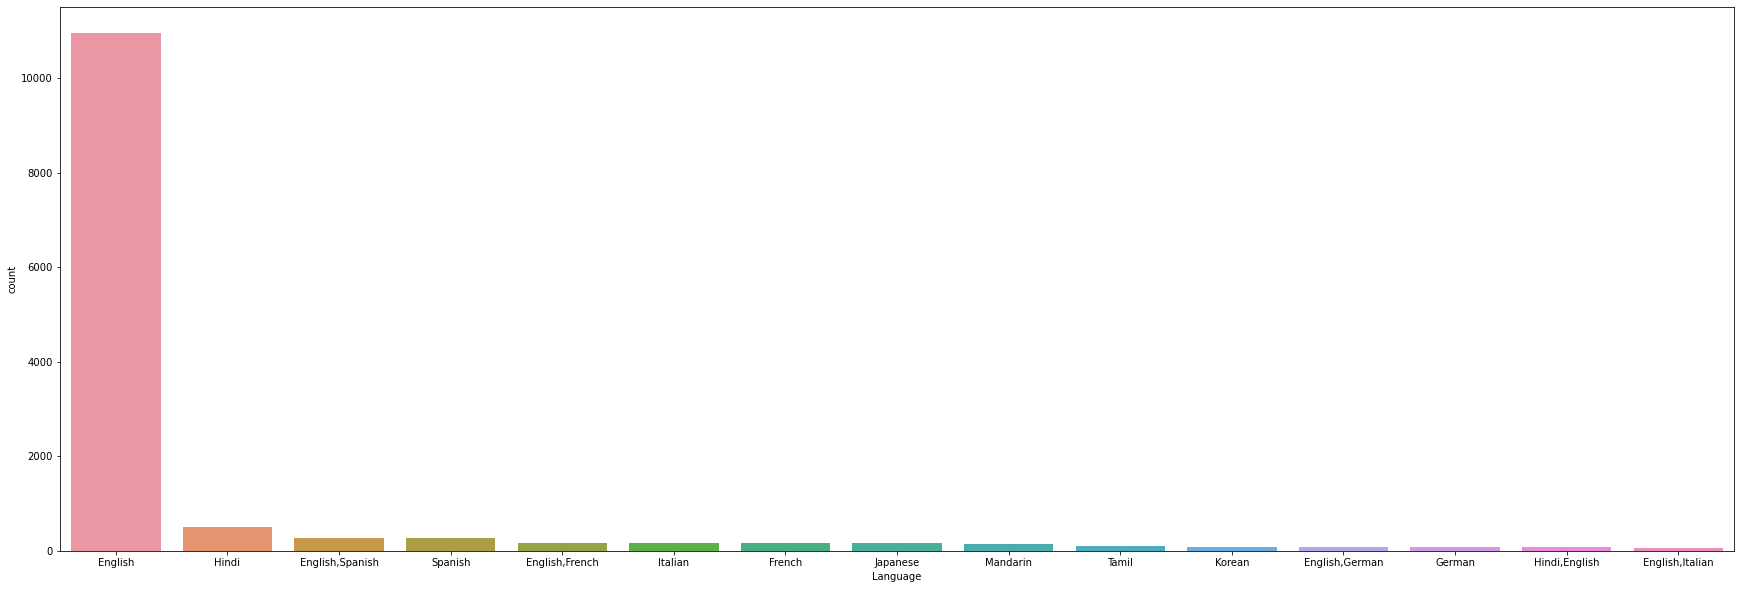

In [64]:
plt.figure(figsize=(30,10))
sns.countplot(x='Language', data=df, order=df.Language.value_counts().index[0:15])